In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv("profitable_orders.csv")
df.head()

,order_number,gender,age_group,new_customer,fast_delivery,loyalty_program,discount_rate,average_item_value,items_per_order,profit
0,5.721630e+12,Female,not specified,0,0,0,0.58,25,10,-78
1,4.965100e+12,Female,not specified,0,0,0,0.32,41,1,2
2,7.182790e+12,Male,not specified,0,0,0,0.39,54,2,17
3,5.708210e+12,Female,not specified,0,0,0,0.45,16,2,-8
4,8.485200e+12,Female,not specified,0,0,0,0.31,14,5,-5


## Mann-Whitney U Test

## Normality

Do men bring more profit than women or non-disclosed gender?


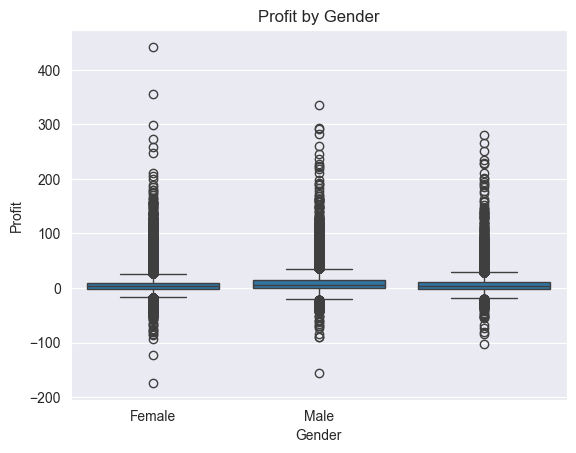

In [3]:
sns.boxplot(x="gender", y="profit", data=df)
plt.title("Profit by Gender")
plt.xlabel("Gender")
plt.ylabel("Profit")
plt.show()

In [4]:
from scipy.stats import shapiro

# Filter profits by gender
profit_male = df[df["gender"] == "Male"]["profit"]
profit_female = df[df["gender"] == "Female"]["profit"]

In [5]:
# count instances of gender
df["gender"].value_counts()

gender
Female    121732
Male       56769
           30370
Name: count, dtype: int64

In [6]:
# Perform the shapiro wilks and interpret the outcome
shapiro_male = shapiro(profit_male)
shapiro_female = shapiro(profit_female)

print(f"The Shapiro-Wilk Test for Males shows a p-value of {round(shapiro_male[1], 3)}")
print(f"The Shapiro-Wilk Test for Females shows a p-value of {round(shapiro_female[1], 3)}")

The Shapiro-Wilk Test for Males shows a p-value of 0.0
The Shapiro-Wilk Test for Females shows a p-value of 0.0


/Users/dylanthunn/.local/share/virtualenvs/statistics-aCBsHkdW/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 56769.
  res = hypotest_fun_out(*samples, **kwds)
/Users/dylanthunn/.local/share/virtualenvs/statistics-aCBsHkdW/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 121732.
  res = hypotest_fun_out(*samples, **kwds)


## D'Agostino and Pearson TestD'Agostino and Pearson Test

In [8]:
from scipy.stats import normaltest

In [9]:
# Perform the D'Agostino and Pearson Test
agostino_male = normaltest(profit_male)
agostino_female = normaltest(profit_female)

# Print the p-values
print(f"The D'Agostino and Pearson Test for Males shows a p-value of {round(agostino_male[1], 3)}")
print(f"The D'Agostino and Pearson Test for Females shows a p-value of {round(agostino_female[1], 3)}")

The D'Agostino and Pearson Test for Males shows a p-value of 0.0
The D'Agostino and Pearson Test for Females shows a p-value of 0.0


Since the p-value is very low, the data is considered not normal

## Mann-Whitney U Test

nullhypothesis: There is no difference between the groups

In [10]:
from scipy.stats import mannwhitneyu

# Perform the test
mannwhitney = mannwhitneyu(profit_male, profit_female, alternative = "two-sided")

# Print the p-value and interpret it
print(f"The Mann-Whitney U Test shows a p-value of {round(mannwhitney[1], 3)}")
if mannwhitney[1] < 0.05:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

The Mann-Whitney U Test shows a p-value of 0.0
Reject the null hypothesis


## Kruskal-Wallis test